<a href="https://colab.research.google.com/github/Jerry086/SALSA/blob/main/Colab/Audio_Embeddings_Similarity_Threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install faiss-cpu

import faiss

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 519.8 kB/s eta 0:00:00


In [5]:
import pandas as pd

metadata = pd.read_csv('/content/drive/MyDrive/audioset/test_metadata_rootclass.csv')
embeddings = pd.read_csv('/content/drive/MyDrive/audioset/test_embeddings_meanpool.csv')

merged_df = pd.merge(metadata, embeddings, on='video_id')

# print(metadata.head())
# print(embeddings.head())
merged_df

,video_id,start_time_seconds,end_time_seconds,labels,root_classes,feature_0,feature_1,feature_2,feature_3,feature_4,...,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127
0,iZcPr3wgJCw,30.0,40.0,['Engine knocking'],['Engine'],64.9,221.3,85.4,7.4,215.8,...,124.0,191.2,144.8,65.8,87.1,153.0,112.2,216.3,187.1,173.0
1,iZmn0dUXP9E,40.0,50.0,"['Toothbrush', 'Electric toothbrush']","['Domestic sounds, home sounds']",93.7,112.2,100.1,20.7,166.8,...,54.9,181.4,106.5,192.7,50.5,67.4,95.2,123.9,190.5,132.4
2,iZ2K_GPtc6g,30.0,40.0,"['Sine wave', 'Chirp tone']",['Other sourceless'],170.6,72.8,107.5,83.9,118.0,...,96.5,204.1,215.9,80.7,77.4,20.7,80.1,190.3,42.6,146.3
3,iZtF1lUPbEQ,20.0,30.0,"['Fart', 'Buzz', 'Music']","['Wild animals', 'Digestive', 'Music', 'Onomat...",170.6,118.4,102.6,128.2,134.6,...,120.7,27.1,137.5,150.0,90.3,94.5,100.1,136.5,156.4,119.3
4,iZFRfh1Wjt8,420.0,430.0,"['Vehicle', 'Vehicle horn, car horn, honking',...","['Alarm', 'Vehicle']",73.9,166.3,82.6,17.5,230.2,...,91.4,149.5,149.7,134.8,124.3,62.7,146.1,166.0,52.4,85.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21777,2Cmn2lplGfc,30.0,40.0,"['Propeller, airscrew']",['Vehicle'],59.7,189.7,13.3,18.3,179.3,...,255.0,214.7,253.7,112.6,123.7,90.4,110.9,138.4,58.5,113.1
21778,2ClQcAd-wJg,30.0,40.0,"['Speech', 'Buzzer']","['Alarm', 'Human voice']",55.0,147.8,237.5,223.2,126.1,...,65.6,122.0,178.2,192.2,198.1,175.9,237.6,61.6,182.2,153.4
21779,-Sclnq22t7o,30.0,40.0,"['Burping, eructation']",['Digestive'],82.0,77.8,171.4,86.6,112.6,...,147.6,129.8,32.3,148.6,101.8,54.0,85.2,107.8,183.9,112.1
21780,-SD9DkKyOrY,30.0,40.0,"['Percussion', 'Drum kit', 'Drum', 'Snare drum...",['Music'],180.4,107.9,81.7,80.9,99.4,...,42.1,33.7,0.7,233.8,150.8,93.2,255.0,128.7,137.1,230.7


In [6]:
import numpy as np
features = merged_df.drop(columns=['video_id', 'start_time_seconds', 'end_time_seconds', 'labels', 'root_classes']).values
features.astype(np.float32)
features.shape

(21782, 128)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree

kd_tree = KDTree(features, leaf_size=40, metric='euclidean')

# Query the KDTree for the four nearest points to each point
distances, indices = kd_tree.query(features, k=4)

nearest_distances = distances[:, 1]  # Nearest neighbor (excluding the point itself)
second_nearest_distances = distances[:, 2]  # Second nearest neighbor
third_nearest_distances = distances[:, 3]  # Third nearest neighbor

print("Distances to the nearest neighbor for each point:", nearest_distances)
print("Distances to the second nearest neighbor for each point:", second_nearest_distances)
print("Distances to the third nearest neighbor for each point:", third_nearest_distances)

nearest_indices = indices[:, 1]
second_nearest_indices = indices[:, 2]
third_nearest_indices = indices[:, 3]

print("Indices of nearest neighbors for each point:", nearest_indices)
print("Indices of second nearest neighbors for each point:", second_nearest_indices)
print("Indices of third nearest neighbors for each point:", third_nearest_indices)

Distances to the nearest neighbor for each point: [650.08257168 366.36713826 337.01130545 ... 341.75268836 358.67284536
 472.76552328]
Distances to the second nearest neighbor for each point: [699.0735369  392.97122032 377.61649858 ... 371.51905738 375.13183016
 507.99824803]
Distances to the third nearest neighbor for each point: [701.22286757 425.65168859 419.52823505 ... 375.56361645 439.10249373
 508.87821726]
Indices of nearest neighbors for each point: [ 1741  2807  6094 ...  4329 13866 11804]
Indices of second nearest neighbors for each point: [ 2925  7387 19785 ... 20454   424 15852]
Indices of third nearest neighbors for each point: [ 8373 19538  4197 ...  3279  9043  8365]


In [9]:
# initialize Faiss index

DIMENSION = 128
index = faiss.IndexFlatL2(DIMENSION)
index.add(features)

# Search for the 4 nearest neighbors (including the point itself)
distances, indices = index.search(features, 4)
nearest_distances = distances[:, 1]
second_nearest_distances = distances[:, 2]
third_nearest_distances = distances[:, 3]

print("Nearest distances for each point:", nearest_distances)
print("Second nearest distances for each point:", second_nearest_distances)
print("Third nearest distances for each point:", third_nearest_distances)

nearest_indices = indices[:, 1]
second_nearest_indices = indices[:, 2]
third_nearest_indices = indices[:, 3]

print("Indices of nearest neighbors for each point:", nearest_indices)
print("Indices of second nearest neighbors for each point:", second_nearest_indices)
print("Indices of third nearest neighbors for each point:", third_nearest_indices)

Nearest distances for each point: [422607.5 134223.5 113576.  ... 116795.  128645.  223508. ]
Second nearest distances for each point: [488703.5 154425.5 142597.  ... 138028.  140723.5 258062. ]
Third nearest distances for each point: [491712.  181178.5 176003.5 ... 141049.5 192811.  258956.5]
Indices of nearest neighbors for each point: [ 1741  2807  6094 ...  4329 13866 11804]
Indices of second nearest neighbors for each point: [ 2925  7387 19785 ... 20454   424 15852]
Indices of third nearest neighbors for each point: [ 8373 19538  4197 ...  3279  9043  8365]


In [52]:
import numpy as np

# Calculate the 80th percentile of each distances
first_percentile_80 = np.percentile(nearest_distances, 80)
second_percentile_80 = np.percentile(second_nearest_distances, 80)
third_percentile_80 = np.percentile(third_nearest_distances, 80)

print(first_percentile_80)
print(second_percentile_80)
print(third_percentile_80)

237058.5
262320.79999999993
276971.6


In [53]:
# Function to count points within a given percentile distance
def count_within_percentile_radius(index, features, percentile_distance):
    counts = []
    for i in range(features.shape[0]):
        # Square the percentile distance for L2 metric in Faiss
        D, I, lims = index.range_search(features[i:i+1], percentile_distance)
        # Subtract 1 to exclude the point itself
        if lims.size > 1:
            count = lims[1] - lims[0] - 1
        else:
            count = 0
        counts.append(count)
    return counts

counts_first = count_within_percentile_radius(index, features, first_percentile_80)
counts_second = count_within_percentile_radius(index, features, second_percentile_80)
counts_third = count_within_percentile_radius(index, features, third_percentile_80)

In [54]:
print(counts_second)

[0, 323, 153, 813, 163, 0, 15580, 225, 59, 867, 542, 16822, 3794, 454, 0, 1238, 0, 11878, 20418, 533, 0, 0, 329, 340, 0, 113, 816, 177, 0, 5147, 296, 17115, 4446, 0, 8, 440, 214, 0, 0, 40, 15423, 1912, 586, 8, 2804, 0, 617, 182, 46, 386, 57, 0, 172, 1984, 0, 0, 424, 0, 0, 8200, 291, 550, 941, 166, 27, 130, 929, 0, 59, 11204, 12497, 124, 3, 519, 0, 5, 79, 3115, 14149, 1, 40, 6, 109, 31, 9307, 16, 4286, 2215, 0, 3209, 55, 983, 10, 24, 891, 13, 269, 0, 351, 2169, 3650, 84, 105, 175, 0, 32, 27, 0, 57, 40, 46, 15, 63, 15112, 902, 31, 387, 499, 0, 1241, 704, 52, 872, 0, 21, 12, 5649, 46, 70, 13, 86, 196, 0, 93, 27, 6449, 8004, 654, 0, 8, 287, 1663, 4419, 3, 360, 0, 21, 30, 1519, 0, 9075, 0, 0, 2733, 1393, 191, 47, 32, 3364, 545, 531, 1580, 36, 1265, 0, 91, 60, 1960, 29, 8134, 17, 28, 51, 1265, 701, 12, 0, 149, 1151, 67, 13, 0, 223, 6728, 309, 368, 84, 59, 46, 0, 521, 0, 109, 33, 0, 13884, 25, 130, 62, 40, 106, 15243, 0, 0, 19927, 177, 1857, 94, 33, 74, 212, 139, 4214, 68, 66, 104, 1796, 13, 

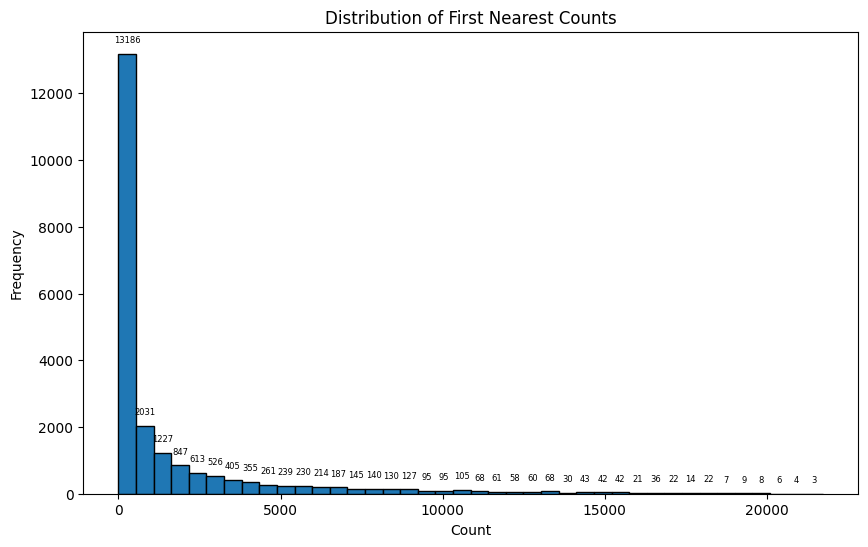

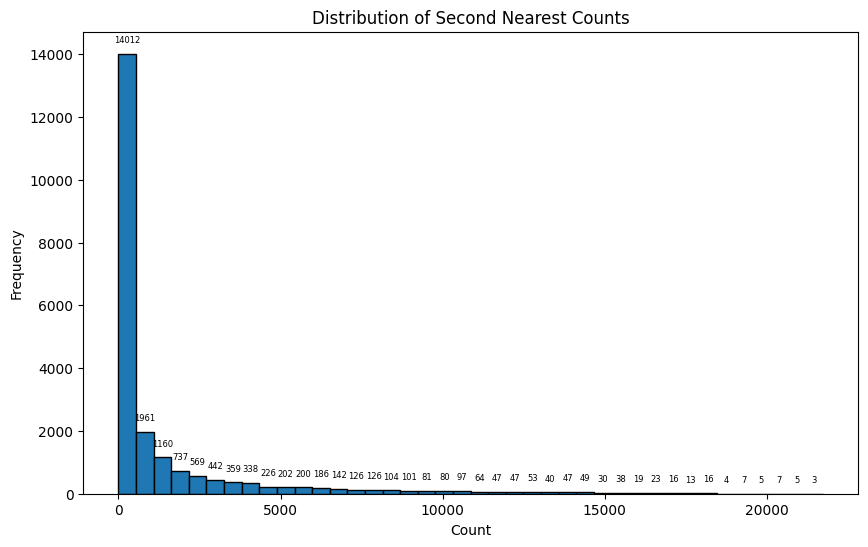

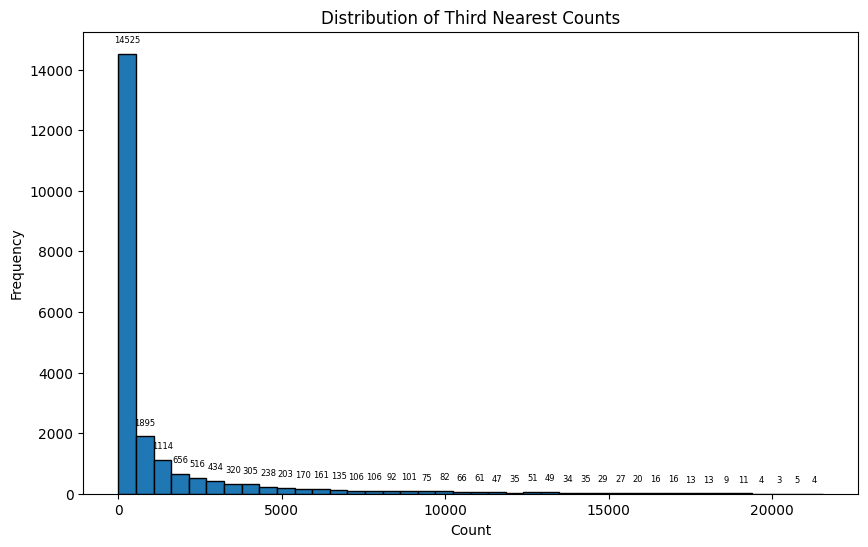

In [55]:
import matplotlib.pyplot as plt

# Function to plot histogram and annotate bars
def plot_histogram(counts, title):
    plt.figure(figsize=(10, 6))
    counts, bins, patches = plt.hist(counts, bins=40, edgecolor='black')
    for p in patches:  # Annotate each bar
        plt.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10),
                     textcoords='offset points', fontsize=6)
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Frequency')
    plt.show()

# Plot each histogram separately
plot_histogram(counts_first, 'Distribution of First Nearest Counts')
plot_histogram(counts_second, 'Distribution of Second Nearest Counts')
plot_histogram(counts_third, 'Distribution of Third Nearest Counts')


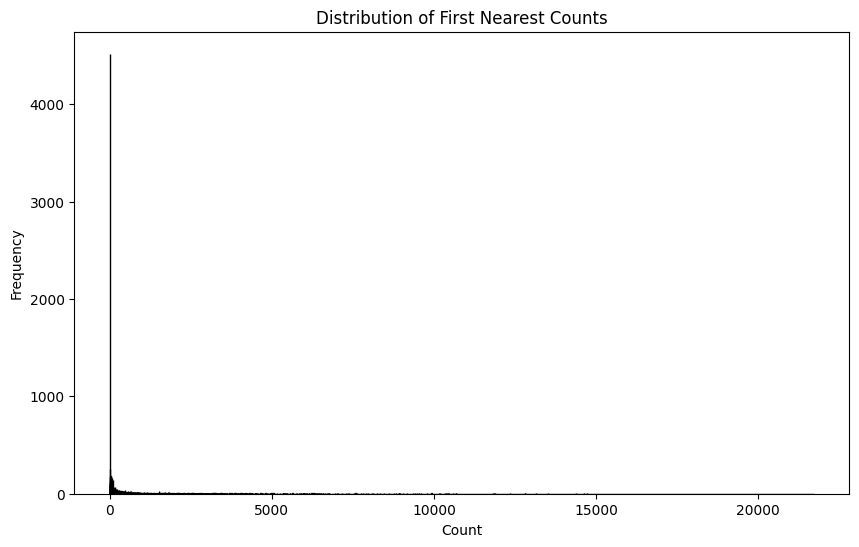

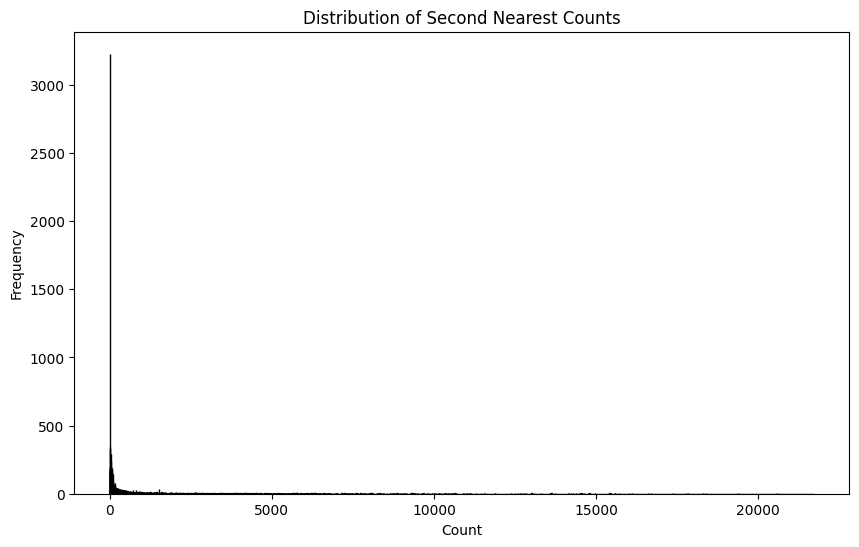

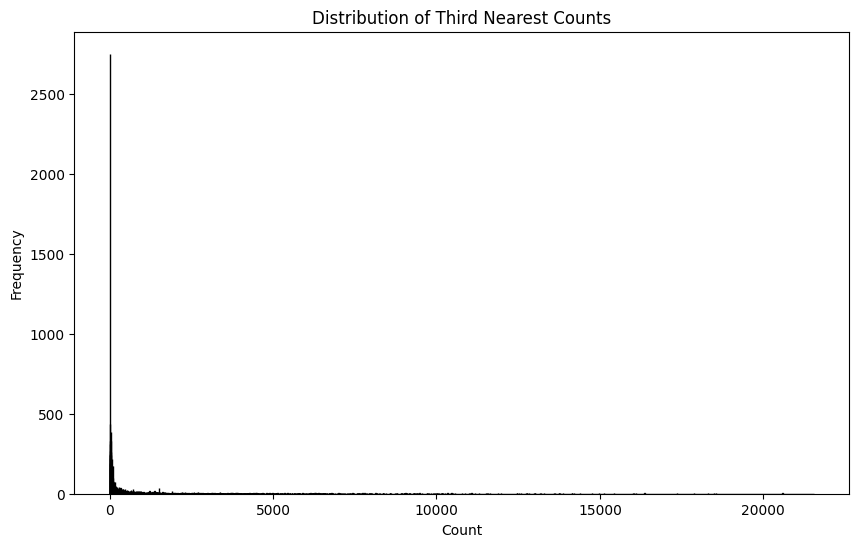

In [63]:
import matplotlib.pyplot as plt

# Function to plot histogram and annotate bars
def plot_histogram(counts, title):
    plt.figure(figsize=(10, 6))
    counts, bins, patches = plt.hist(counts, bins=10000, edgecolor='black')
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Frequency')
    plt.show()

# Plot each histogram separately
plot_histogram(counts_first, 'Distribution of First Nearest Counts')
plot_histogram(counts_second, 'Distribution of Second Nearest Counts')
plot_histogram(counts_third, 'Distribution of Third Nearest Counts')

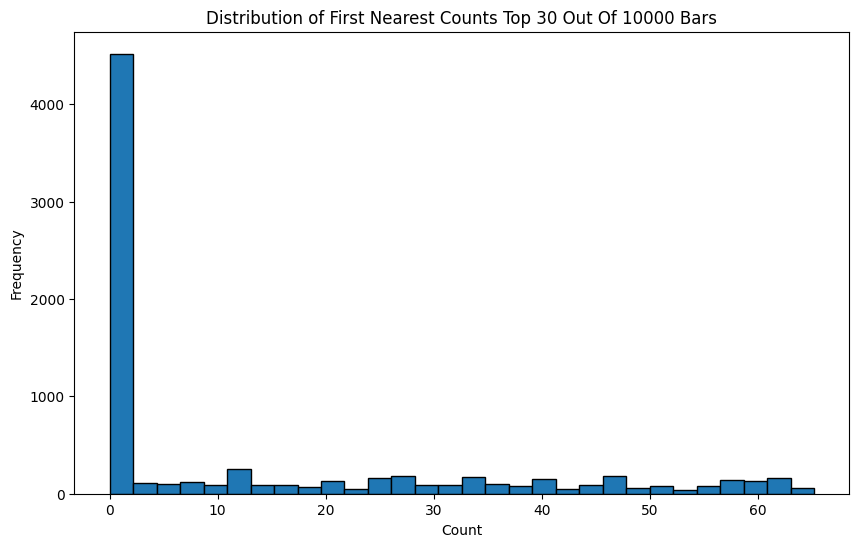

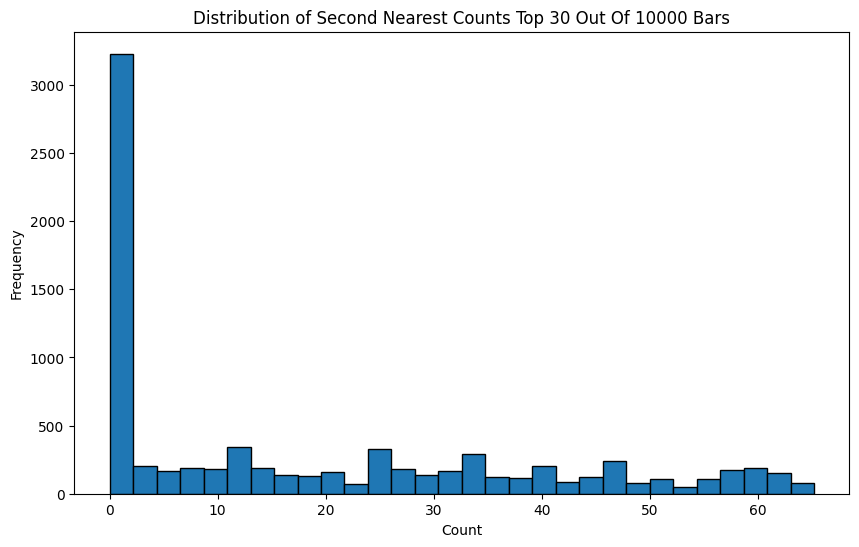

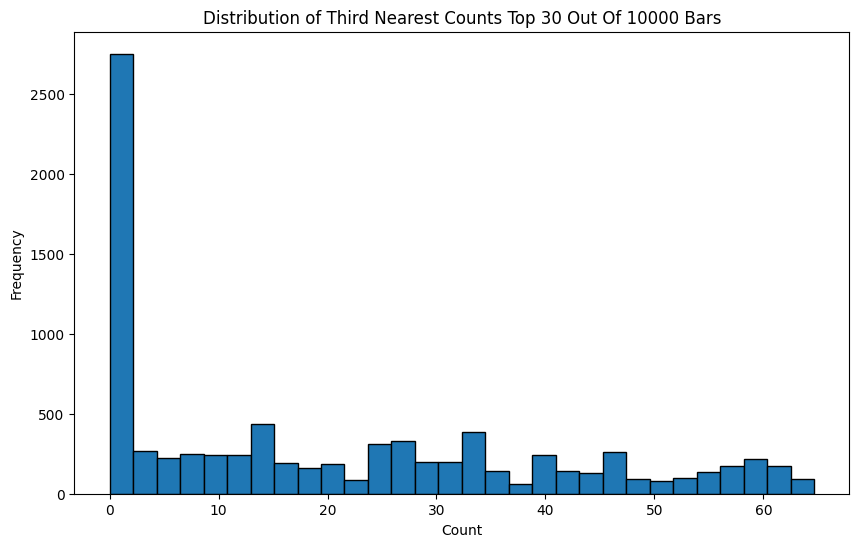

In [64]:
import matplotlib.pyplot as plt

# Function to plot histogram and annotate bars
def plot_histogram(counts, title):
    plt.figure(figsize=(10, 6))
    # Calculate the bin edges for 10000 bins and then select the range for the first 30 bins
    bin_edges = np.linspace(min(counts), max(counts), 10001)  # 10000 bins means 10001 edges
    selected_bins = bin_edges[:31]  # Get the edges for the first 30 bins

    # Plot the histogram using the selected bins
    plt.hist(counts, bins=selected_bins, edgecolor='black')
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Frequency')
    plt.show()

# Plot each histogram separately
plot_histogram(counts_first, 'Distribution of First Nearest Counts Top 30 Out Of 10000 Bars')
plot_histogram(counts_second, 'Distribution of Second Nearest Counts Top 30 Out Of 10000 Bars')
plot_histogram(counts_third, 'Distribution of Third Nearest Counts Top 30 Out Of 10000 Bars')